# Clasificador binario usando el clasificador de descenso estocástico (SGDC)
En este ejemplo se va a desarrollar un clasificador binario usando el dtaset MNISt que contiene 70000 números escritos a mano en un formato de 28x28, pero guardado en una dimensión (784 elementos).
La clase positiva serán los numeros impares y la negativa serán los pares.
Se va a usar un pipeline para escalar los datos y clasificar posterioremente.

In [1]:
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os #el módulo os proporciona funcionalidad independiente del sistema operativo. 
#proporciona una interfaz para interactuar con el sistema operativo en el que se ejecuta el programa. 
#Permite realizar operaciones relacionadas con la gestión de archivos, directorios, rutas, variables de entorno 
#y otras funcionalidades del sistema operativo.

In [2]:
import numpy as np
from sklearn.datasets import fetch_openml 
mnist = fetch_openml('mnist_784', version=1) #Carga la version de 28x28 = 784
mnist.keys() #Para ver la estructura del dataset

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"] #Almacena en X e y la imagen de los números y su valor, respectivamente
X.shape #Para ver el formato del conjunto de entrenamiento

(70000, 784)

In [4]:
 #Convierte a matrices de numpy
X = X.to_numpy()
y = y.to_numpy()
X.shape
#la imagen de cada número e

(70000, 784)

In [5]:
#Para ver el tipo almacenado. Comprobamos que es un entero
y.dtype

dtype('O')

In [6]:
#Para ver su dimensión
y.shape

(70000,)

In [7]:
#Lo convertimos a entero de 8 bits (el mayor es un 9 y no es necesaria más capacidad) para detectar
#si es par o impar con el operador resto
y = y.astype(np.uint8)

In [8]:
#Mostramos la matriz convertida a vector unidimensional correspondiente a la imagen del primer número en 
# niveles de gris
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [9]:
y[0] #El primer número es un 5

5

In [10]:
#Ahora vamos a definir dos clases, para implementar un clasificador binario

In [11]:
#Será verdadero para los valores mayores que 4 y falso para los <= 4
y_Impar = (y % 2 == 1)

Ahora se define un clasificador basado en el descenso de gradiente estocástico, apropiado para datasets con muchas instancias. Esto se debe en parte a que SGD se ocupa de las instancias de capacitación de forma independiente, una a la vez (lo que también hace que SGD sea muy adecuado para el aprendizaje en línea), como veremos más adelante. Creemos un SGDClassifier y entrenémoslo en todo el conjunto de entrenamiento.
Para escalar los datos importamos el escalado estandar. También preparamos para poder usar pipeline y la division train test.


In [12]:
from sklearn.preprocessing import StandardScaler #Para escalar los datos
from sklearn.pipeline import make_pipeline #Para usar el pipe
from sklearn.linear_model import SGDClassifier #Para usar el clasificador SGD
from sklearn.model_selection import train_test_split #Para particionar conjuntos de entrenamiento y test.

In [13]:
#Ahora separamos los conjuntos de test y entrenamiento

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y_Impar, stratify=y_Impar, test_size = 0.20)
#stratify es para estratificar en función del objetivo y que los conjuntos estén balanceados.
#test_size indica el tamaño del conjunto de test, si no se indica es 0.25 

In [15]:
import collections
collections.Counter(y_test) #Para ver la frecuencia como se distribuye el y_test

Counter({True: 7116, False: 6884})

In [16]:
collections.Counter(y_train) #Para ver la frecuencia como se distribuye el y_train

Counter({False: 27534, True: 28466})

In [17]:
#Usamos el pipe para escalar los datos y definir el clasificador

In [18]:
sgd_clasificador = make_pipeline(StandardScaler(), SGDClassifier(random_state = 42))

In [19]:
#Aplicamos el clasificador al conjunto de entrenamiento mediante la función fit
sgd_clasificador.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=42))])

Ahora vamos acomprobar si ha acertado los 8 primeros en el conjunto de entrenamiento

In [20]:
y_train[:8]

array([False,  True,  True, False, False, False, False, False])

In [21]:
sgd_clasificador.predict(X_train[:8])

array([False,  True,  True, False, False, False, False, False])

Ahora comprobamos si ha acertado los ocho primeros en el conjunto de test

In [22]:
y_test[:8]

array([ True, False,  True,  True,  True,  True, False, False])

In [23]:
sgd_clasificador.predict(X_train[:8])

array([False,  True,  True, False, False, False, False, False])

Ahora comprobamos un elemento en particular del conjunto de entrenamiento

In [24]:
y_train[50000]

False

In [25]:
#En este caso se usa el doble corchete para usar como argumento un array. Si se pone simple no funciona.
sgd_clasificador.predict(X_train[[50000]]) 

array([ True])

Ahora vamos a ver la matriz de confusion y las curvas ROC y precision recall

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#Calculamos la predicción para el conjunto de test
y_pred = sgd_clasificador.predict(X_test)
#Se calcula la matriz de confusión.
cm = confusion_matrix(y_test, y_pred)


In [27]:
cm

array([[6018,  866],
       [ 725, 6391]])

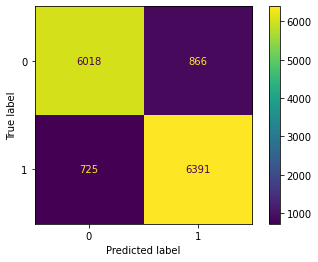

In [28]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [29]:
#Ahora vamos a calcular accuracy, precision, recall y F1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.8863571428571428, 0.880666942262643, 0.8981169196177627, 0.8893063382731511)

Vamos a ver como los valores son mejores para el conjunyto de entrenamiento

In [30]:
#Calculamos la predicción para el conjunto de entrenamiento
y_pred_train = sgd_clasificador.predict(X_train)

In [31]:
cm_train = confusion_matrix(y_train, y_pred_train)

In [32]:
cm_train

array([[24241,  3293],
       [ 2850, 25616]])

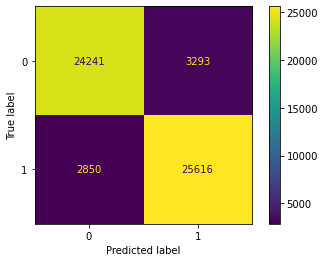

In [33]:
cm_train_display = ConfusionMatrixDisplay(cm_train).plot()

In [34]:
accuracy_score(y_train, y_pred_train), precision_score(y_train, y_pred_train), recall_score(y_train, y_pred_train), f1_score(y_train, y_pred_train)

(0.8903035714285714, 0.8860908367636376, 0.899880559263683, 0.8929324618736384)

Se puede observar que los valores son mejores en el conjunto de entrenamiento

In [35]:
#Ahora vamos a ver la curva ROC
from sklearn.metrics import roc_curve, roc_auc_score #para obtener la curva roc y su área
from sklearn.metrics import RocCurveDisplay

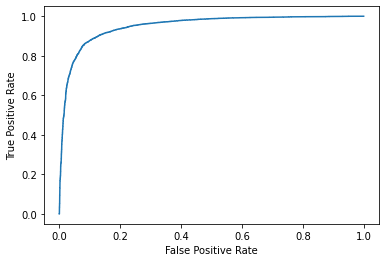

In [36]:
y_score = sgd_clasificador.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=sgd_clasificador.classes_[1])
#Solo recoge los dos primeros valores devueltos.
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [37]:
roc_auc_score(y_test, y_score) #area bajo la curva roc

0.9500993987246784

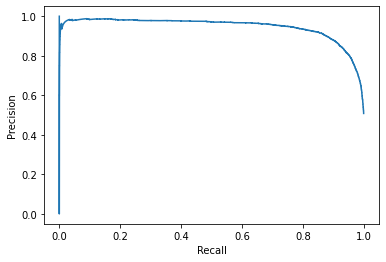

In [38]:
#Ahora vamos a crear la curva precision recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=sgd_clasificador.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()


***Ahora vamos a clasificarlo usando validación cruzada

In [39]:
from sklearn.model_selection import cross_val_score
#Realiza la validación cruzada devolviendo la medida que se refleje en el parámetro scoring

In [40]:
cross_val_score(sgd_clasificador, X_train, y_train, cv=5, scoring="accuracy")

array([0.88241071, 0.885     , 0.88535714, 0.88276786, 0.88767857])

In [41]:
#Ahora vamos a hacer predicciones usando cross_val_predict
from sklearn.model_selection import cross_val_predict
#Realiza la validación cruzada, igual que antes, pero devuelve las predicciones hechas en el fold de test

In [42]:
y_train_pred = cross_val_predict(sgd_clasificador, X_train, y_train, cv=5)

In [43]:
y_train_pred[:5]

array([False,  True,  True, False, False])

In [44]:
y_train[:5]

array([False,  True,  True, False, False])

In [45]:
cm = confusion_matrix(y_train, y_train_pred)

In [46]:
cm

array([[24210,  3324],
       [ 3136, 25330]])

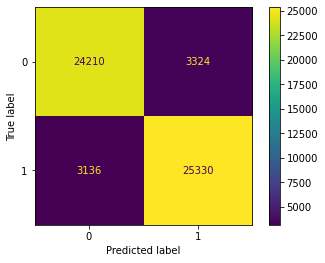

In [47]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [49]:
accuracy_score(y_train, y_train_pred), precision_score(y_train, y_train_pred), recall_score(y_train, y_train_pred), f1_score(y_train, y_train_pred)

(0.8846428571428572,
 0.8839952537167586,
 0.8898334855617227,
 0.8869047619047619)